In [2]:
import pandas as pd
from scipy import stats

In [12]:
df = pd.read_csv("../../dataset/pompa-2.csv")
update_df = pd.read_csv("../../dataset/pompa-3-27.csv")

In [13]:
df.head()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,temp,flow,pressure_left,pressure_right
0,1684902481218777400,693.0,598.0,445.0,480.0,270.0,218.0,3.84,29.36,101.63,0.13,0.11
1,1684902482217178100,695.0,593.0,445.0,484.0,265.0,218.0,3.79,29.36,103.10,0.12,0.11
2,1684902483218775900,701.0,591.0,445.0,485.0,264.0,212.0,3.77,29.36,103.46,0.12,0.10
3,1684902484217127800,694.0,589.0,445.0,482.0,263.0,215.0,3.75,29.36,102.36,0.12,0.10
4,1684902485215962500,698.0,588.0,445.0,480.0,269.0,217.0,3.74,29.36,101.63,0.13,0.11


In [14]:
update_df.head()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,level_2,temp,flow,pressure_left,pressure_right
0,1685150213616710500,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
1,1685150214624416200,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,-22.90,0.0,0.0,0.0
2,1685150215620754400,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
3,1685150216628057800,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0
4,1685150217626829800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-23.13,0.0,0.0,0.0


In [15]:
df.describe()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,temp,flow,pressure_left,pressure_right
count,6.161500e+04,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000,61615.000000
mean,1.684967e+18,696.149899,606.566210,445.323817,484.326576,268.527193,215.870048,3.923594,29.398774,103.216062,0.131030,0.103953
std,4.512293e+13,9.471784,9.132154,3.634191,4.730643,2.884744,2.400892,0.088468,0.428684,1.735665,0.006487,0.005922
min,1.684902e+18,654.000000,582.000000,428.000000,460.000000,257.000000,206.000000,3.680000,27.350000,94.290000,0.110000,0.080000
25%,1.684918e+18,689.000000,600.000000,444.000000,481.000000,266.000000,214.000000,3.860000,29.240000,102.000000,0.130000,0.100000
50%,1.684992e+18,696.000000,607.000000,446.000000,484.000000,269.000000,216.000000,3.930000,29.480000,103.100000,0.130000,0.100000
75%,1.685007e+18,703.000000,613.000000,448.000000,487.000000,271.000000,218.000000,3.990000,29.710000,104.200000,0.140000,0.110000
max,1.685023e+18,733.000000,634.000000,459.000000,507.000000,280.000000,230.000000,4.190000,31.010000,111.530000,0.150000,0.130000


In [25]:
update_df[1200:44000].describe()

,timestamp,adc_actuator_pump,adc_level,adc_temp,adc_flow,adc_pressure_left,adc_pressure_right,level,level_2,temp,flow,pressure_left,pressure_right
count,4.280000e+04,42800.000000,42800.000000,42800.000000,42800.000000,42800.000000,42800.00000,42800.000000,42800.000000,42800.000000,42800.000000,42800.000000,42800.000000
mean,1.685173e+18,710.089229,607.781215,442.435397,535.497617,291.406706,232.01715,3.935564,3.938009,29.057726,121.990149,0.177350,0.137999
std,1.237027e+13,6.222665,8.433609,4.318089,5.231619,2.933731,2.51876,0.081369,0.083917,0.509759,1.919609,0.007272,0.005775
min,1.685151e+18,670.000000,578.000000,421.000000,508.000000,262.000000,221.00000,3.640000,3.650000,26.530000,111.900000,0.120000,0.120000
25%,1.685162e+18,707.000000,602.000000,440.000000,532.000000,289.000000,230.00000,3.880000,3.880000,28.770000,120.710000,0.170000,0.130000
50%,1.685173e+18,711.000000,608.000000,443.000000,535.000000,291.000000,232.00000,3.940000,3.940000,29.120000,121.810000,0.180000,0.140000
75%,1.685184e+18,714.000000,614.000000,446.000000,539.000000,293.000000,234.00000,4.000000,4.000000,29.480000,123.280000,0.180000,0.140000
max,1.685194e+18,737.000000,638.000000,474.000000,564.000000,305.000000,243.00000,4.230000,4.230000,32.780000,132.450000,0.210000,0.160000


In [17]:
print(len(df))

61615


array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
      dtype=object)

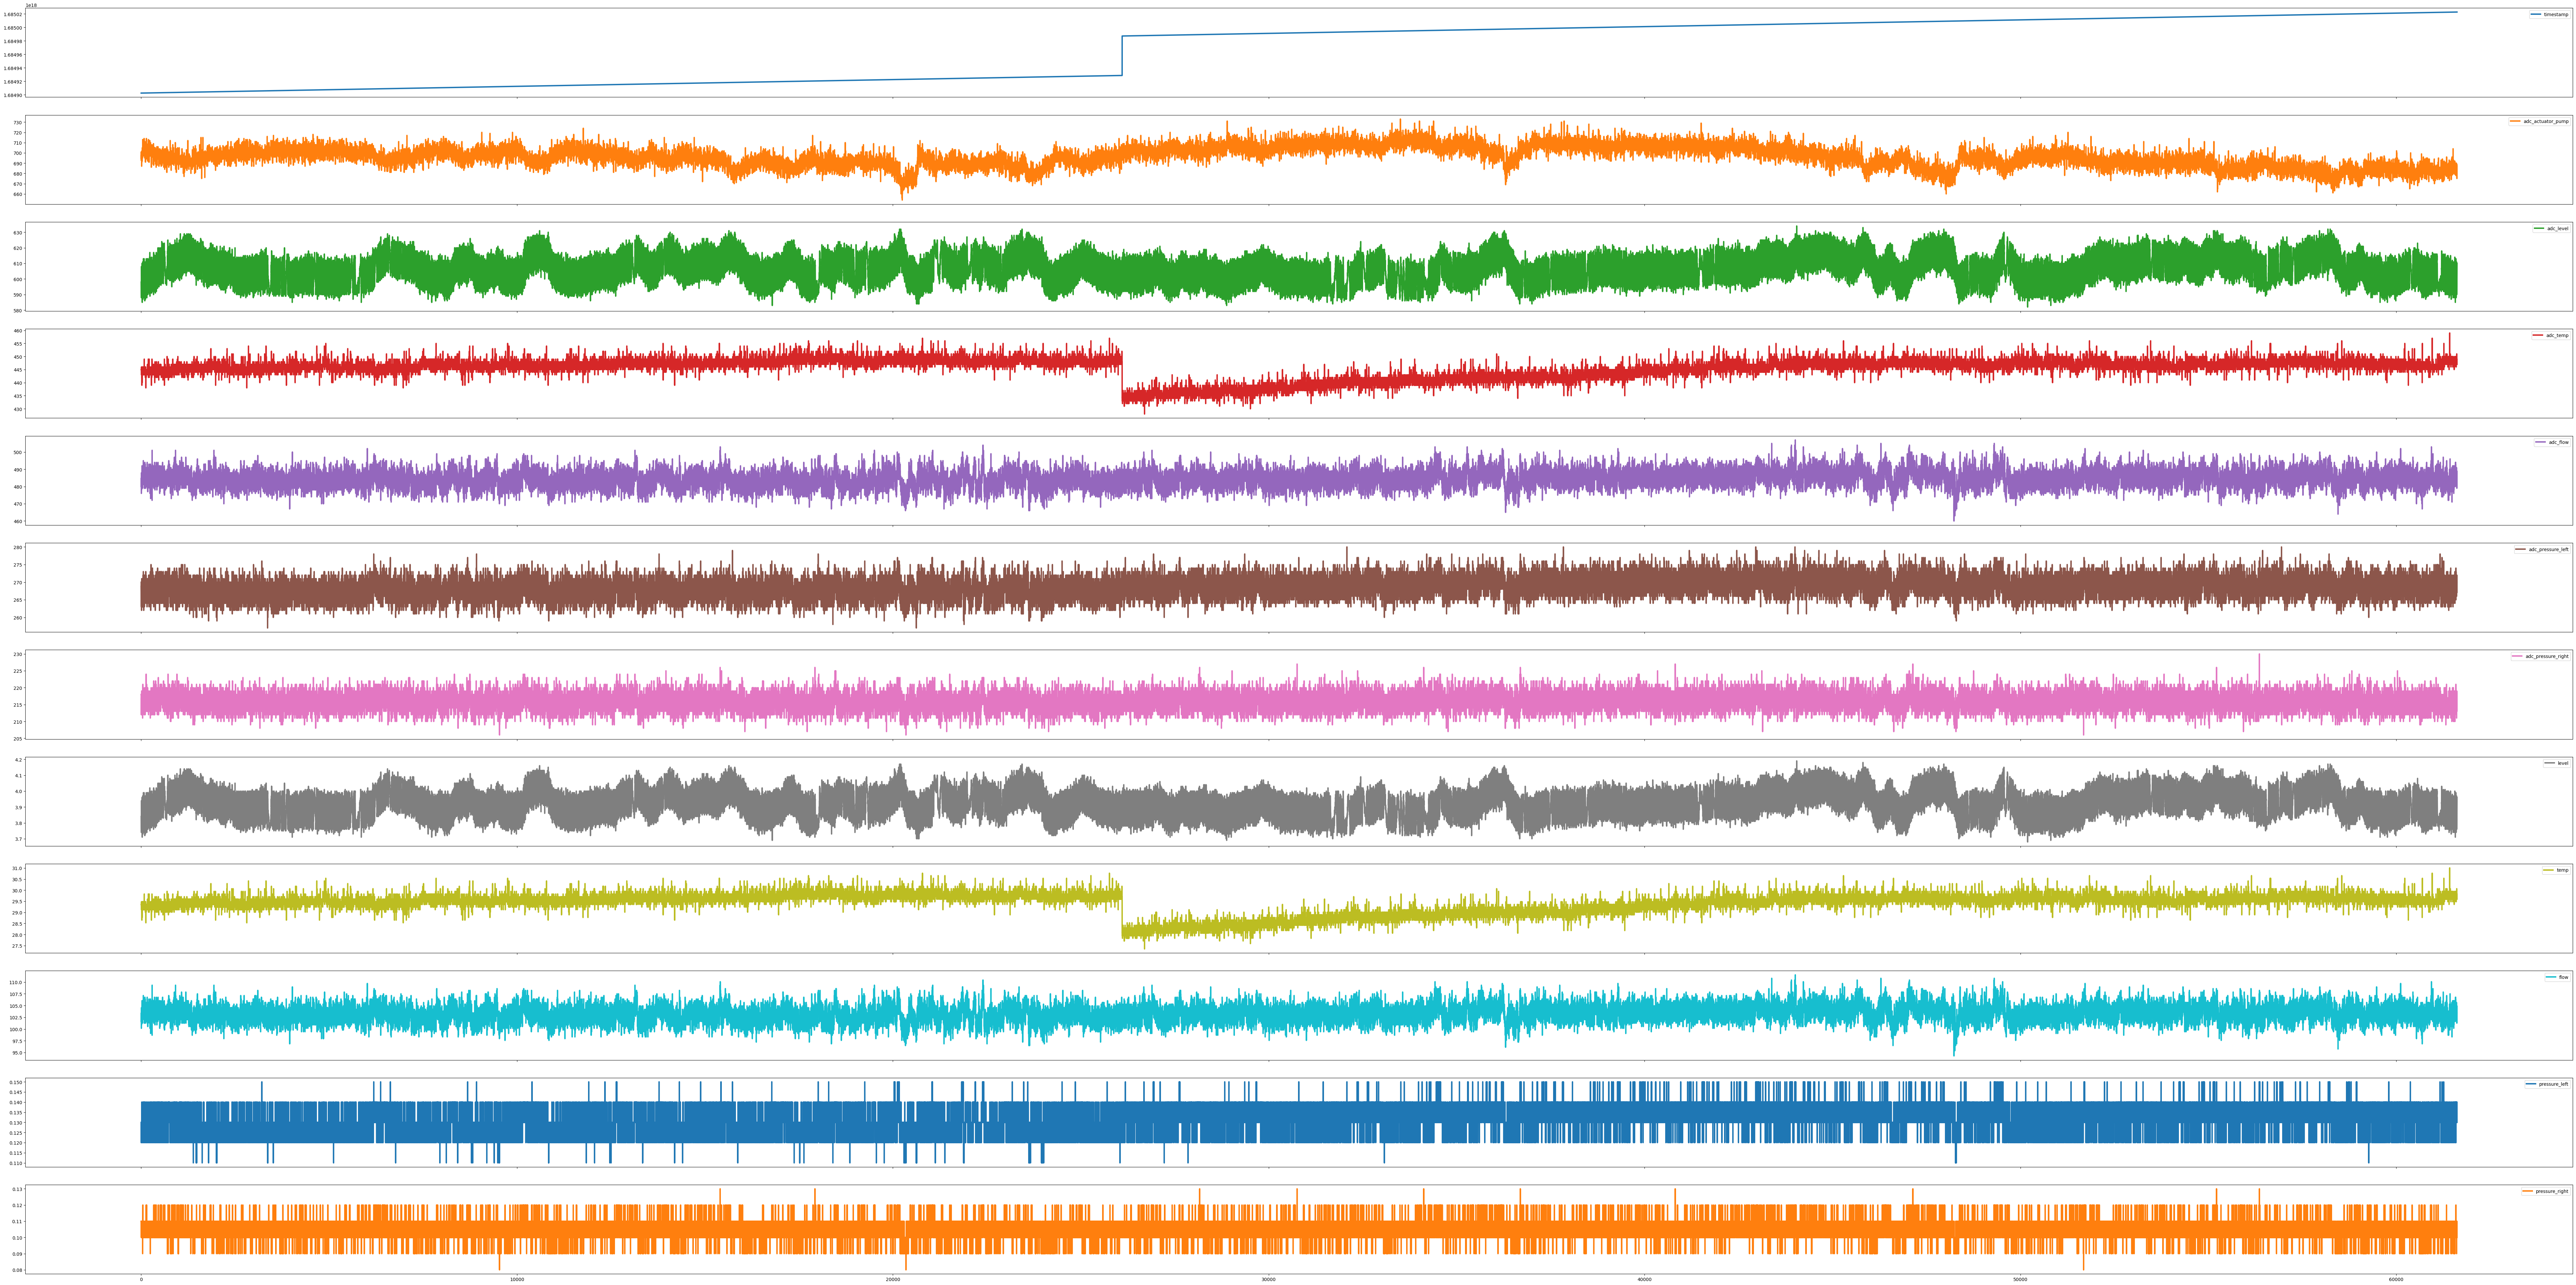

In [18]:
# df["level"].plot()

df.plot(subplots=True, figsize=(100, 50), linewidth=3)

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
       <Axes: >], dtype=object)

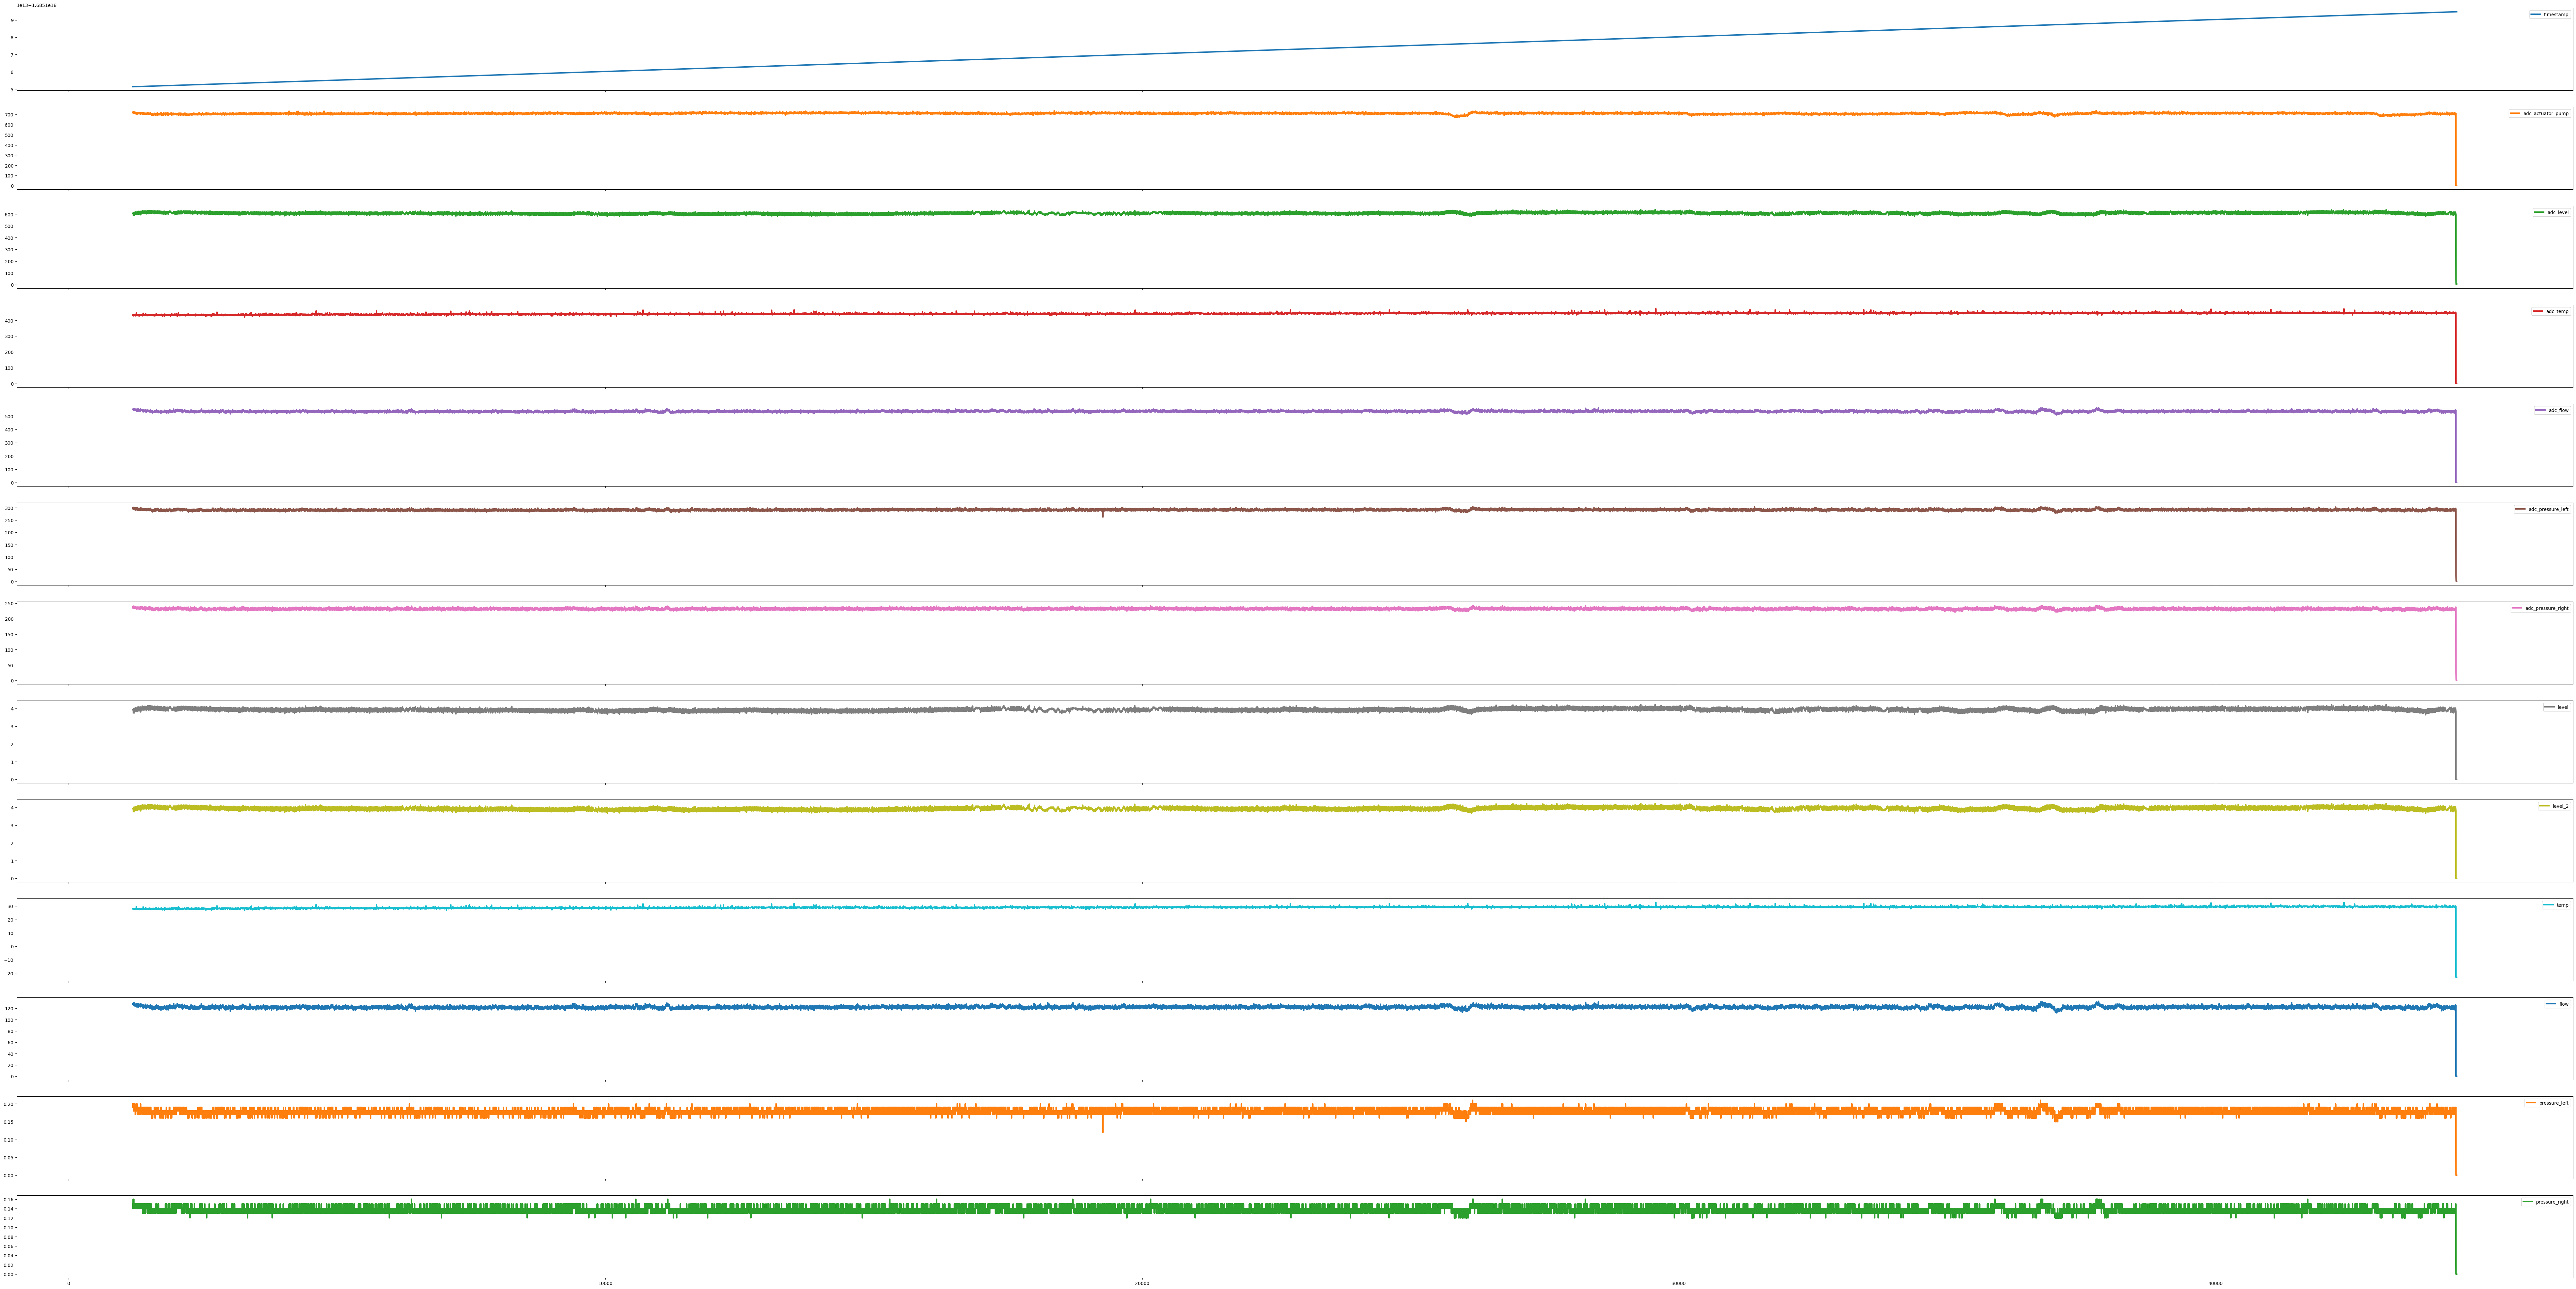

In [24]:
update_df[1200:].plot(subplots=True, figsize=(100, 50), linewidth=3)

In [29]:
n = len(df)
train_df = df[0:int(n*0.8)]
test_df = df[int(n*0.8):]

In [30]:
features_considered = []
for column in ["adc_actuator_pump", "adc_level",	"adc_temp",	"adc_flow",	"adc_pressure_left",	"adc_pressure_right"]:
  ks_result = stats.ks_2samp(train_df[column],test_df[column])
  print(column, ks_result)
  if (ks_result.statistic < 0.2):
    features_considered.append(column)

adc_actuator_pump KstestResult(statistic=0.5023938975898725, pvalue=0.0, statistic_location=693.0, statistic_sign=-1)
adc_level KstestResult(statistic=0.06005031242392278, pvalue=2.4134179277127117e-31, statistic_location=614.0, statistic_sign=1)
adc_temp KstestResult(statistic=0.33516594984987425, pvalue=0.0, statistic_location=445.0, statistic_sign=1)
adc_flow KstestResult(statistic=0.06879412480727093, pvalue=5.198488010315311e-41, statistic_location=483.0, statistic_sign=1)
adc_pressure_left KstestResult(statistic=0.07808569341881033, pvalue=9.98857241822761e-53, statistic_location=267.0, statistic_sign=1)
adc_pressure_right KstestResult(statistic=0.007506289052990334, pvalue=0.6323009832785553, statistic_location=216.0, statistic_sign=-1)


In [31]:
train_df = df[features_considered]

for feature in features_considered:
    train_df[f"{feature}-past"] = train_df[feature].shift(1)

train_df.head()

C:\Users\fadel\AppData\Local\Temp\ipykernel_20000\2272438866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f"{feature}-past"] = train_df[feature].shift(1)
C:\Users\fadel\AppData\Local\Temp\ipykernel_20000\2272438866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df[f"{feature}-past"] = train_df[feature].shift(1)
C:\Users\fadel\AppData\Local\Temp\ipykernel_20000\2272438866.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

,adc_level,adc_flow,adc_pressure_left,adc_pressure_right,adc_level-past,adc_flow-past,adc_pressure_left-past,adc_pressure_right-past
0,598.0,480.0,270.0,218.0,NaN,NaN,NaN,NaN
1,593.0,484.0,265.0,218.0,598.0,480.0,270.0,218.0
2,591.0,485.0,264.0,212.0,593.0,484.0,265.0,218.0
3,589.0,482.0,263.0,215.0,591.0,485.0,264.0,212.0
4,588.0,480.0,269.0,217.0,589.0,482.0,263.0,215.0


In [32]:
train_df.to_csv("../../dataset/pompa-enhance.csv", index=False)